In [71]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [72]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [73]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [74]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [75]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_market_data.select_dtypes(include=['float64', 'int64']))

In [76]:
# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(scaled_data, columns=df_market_data.select_dtypes(include=['float64', 'int64']).columns)

# Copy the crypto names from the original DataFrame
crypto_names = df_market_data.index

# Set the coin_id column as index
df_scaled["coin_id"] = crypto_names
df_scaled.set_index("coin_id", inplace=True)

# Display the scaled DataFrame
display(df_scaled)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [77]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))
print(k_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [78]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list


# Loop over k-values from 1 to 11
for k in k_values:
    # Create a KMeans model with k clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
    
    # Fit the model to the scaled data
    kmeans.fit(df_scaled)
    
    # Append the inertia value to the list
    inertia_values.append(kmeans.inertia_)

# Output the inertia values
print(inertia_values)




[287.0, 198.5718180979813, 145.63574772192862, 79.02243535120975, 66.21778006000338, 59.13907002537009, 48.406314490413614, 38.99358798927969, 34.40059545400234, 28.57360256096785, 23.890044355377952]


In [79]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': k_values,
    'inertia': inertia_values
}


# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)
print(elbow_df)

     k     inertia
0    1  287.000000
1    2  198.571818
2    3  145.635748
3    4   79.022435
4    5   66.217780
5    6   59.139070
6    7   48.406314
7    8   38.993588
8    9   34.400595
9   10   28.573603
10  11   23.890044


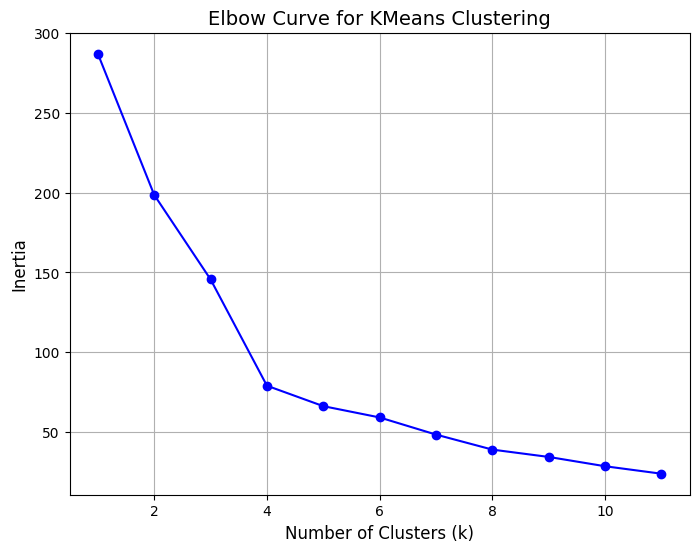

In [80]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o', linestyle='-', color='b')

plt.title('Elbow Curve for KMeans Clustering', fontsize=14)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)

plt.grid(True)

plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer: 4** 

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [81]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4, random_state=0)


In [82]:
# Fit the K-Means model using the scaled DataFrame
kmeans.fit(df_scaled)


KMeans(n_clusters=4, random_state=0)

In [83]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
predicted_clusters = kmeans.predict(df_scaled)

# Print the resulting array of cluster values.
print(predicted_clusters)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [84]:
# Create a copy of the scaled DataFrame
df_scaled_copy = df_scaled.copy()
print(df_scaled_copy.columns)

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')


In [85]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
df_scaled_copy['Cluster'] = predicted_clusters

# Display the copy of the scaled DataFrame
print(df_scaled_copy.columns)

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y', 'Cluster'],
      dtype='object')


In [86]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

scatter_plot = df_scaled_copy.hvplot.scatter(
    x="price_change_percentage_24h", 
    y="price_change_percentage_7d", 
    c="Cluster",          # Color points by the predicted clusters
    hover_cols=["coin_id"],  # Display the cryptocurrency name when hovering
    title="Cryptocurrency Clusters",
    xlabel="24h Price Change (%)",
    ylabel="7d Price Change (%)",
    cmap="viridis"        # Optional: Sets the color map for the clusters
)

scatter_plot

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [87]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)
print(pca)

PCA(n_components=3)


In [88]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
df_pca = pca.fit_transform(df_scaled)



# View the scaled PCA data
print(df_pca)

[[-0.60066733  0.84276006  0.46159457]
 [-0.45826071  0.45846566  0.95287678]
 [-0.43306981 -0.16812638 -0.64175193]
 [-0.47183495 -0.22266008 -0.47905316]
 [-1.15779997  2.04120919  1.85971527]
 [-0.51653377  1.38837748  0.80407131]
 [-0.45071134  0.51769912  2.84614316]
 [-0.34559977  0.72943939  1.47801284]
 [-0.64946792  0.43216514  0.60030286]
 [-0.75901394 -0.20119979 -0.21765292]
 [-0.24819846 -1.37625159 -1.46202571]
 [-0.43840762 -0.17533654 -0.6633884 ]
 [-0.69342533 -0.47381462 -0.52759693]
 [ 0.06049915  2.90940385  1.49857131]
 [-0.39335243 -0.10819197 -0.01275608]
 [-0.79617564 -0.49440875  1.08281169]
 [ 0.06407452 -1.26982514 -1.09882928]
 [-0.48901506 -0.73271912 -0.06254323]
 [-0.3062723   0.70341515  1.71422359]
 [-0.51352775 -0.14280239 -0.65656583]
 [-0.36212044 -0.98691441 -0.72875232]
 [-0.60426463  0.82739764  0.43931594]
 [-0.4132956  -0.67411527 -1.07662834]
 [-0.40748304 -0.21250655 -0.35142563]
 [ 0.60897382  0.56353212 -1.14874159]
 [-0.45021114 -0.15101945

In [89]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance ratio for each principal component: {explained_variance}")

Explained variance ratio for each principal component: [0.3719856  0.34700813 0.17603793]


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer: 0.89503166** 

In [90]:
# Create a new DataFrame with the PCA data.
df_pca_scaled = pd.DataFrame(df_pca, columns=['PC1', 'PC2', 'PC3'])


# Copy the crypto names from the original scaled DataFrame
df_pca_scaled['coin_id'] = df_scaled.index.copy()


# Set the coin_id column as index
df_pca_scaled.set_index('coin_id', inplace=True)


# Display the scaled PCA DataFrame
print(df_pca_scaled)


                           PC1       PC2       PC3
coin_id                                           
bitcoin              -0.600667  0.842760  0.461595
ethereum             -0.458261  0.458466  0.952877
tether               -0.433070 -0.168126 -0.641752
ripple               -0.471835 -0.222660 -0.479053
bitcoin-cash         -1.157800  2.041209  1.859715
binancecoin          -0.516534  1.388377  0.804071
chainlink            -0.450711  0.517699  2.846143
cardano              -0.345600  0.729439  1.478013
litecoin             -0.649468  0.432165  0.600303
bitcoin-cash-sv      -0.759014 -0.201200 -0.217653
crypto-com-chain     -0.248198 -1.376252 -1.462026
usd-coin             -0.438408 -0.175337 -0.663388
eos                  -0.693425 -0.473815 -0.527597
monero                0.060499  2.909404  1.498571
tron                 -0.393352 -0.108192 -0.012756
tezos                -0.796176 -0.494409  1.082812
okb                   0.064075 -1.269825 -1.098829
stellar              -0.489015 

---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [91]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))
print(k_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [92]:
# Create an empty list to store the inertia values
pca_inertia_values = []


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_pca_scaled)
    pca_inertia_values.append(kmeans.inertia_)

print(pca_inertia_values)


[256.87408556789217, 168.81189630685196, 115.91807663320047, 49.66549665179731, 41.35731380312851, 30.79664178704156, 25.915456910456104, 21.890936274633198, 17.720698854473643, 13.838698708864552, 7.9843548118962175]


In [93]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': k_values,  
    'inertia': pca_inertia_values  
}
# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

print(df_elbow)

     k     inertia
0    1  256.874086
1    2  168.811896
2    3  115.918077
3    4   49.665497
4    5   41.357314
5    6   30.796642
6    7   25.915457
7    8   21.890936
8    9   17.720699
9   10   13.838699
10  11    7.984355


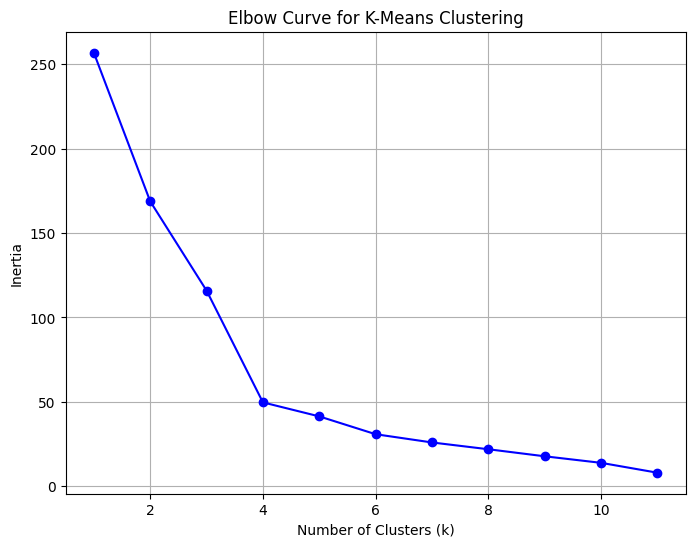

In [94]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.

plt.figure(figsize=(8, 6))  
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o', linestyle='-', color='b')
plt.title('Elbow Curve for K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer: 4**


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer: No** 

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [95]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4, random_state=0)



In [96]:
# Fit the K-Means model using the PCA data
kmeans.fit(df_pca_scaled)

KMeans(n_clusters=4, random_state=0)

In [97]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
pca_predicted_clusters = kmeans.predict(df_pca_scaled)

# Print the resulting array of cluster values.
print(pca_predicted_clusters)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [98]:
# Create a copy of the scaled PCA DataFrame
df_pca_scaled_copy = df_pca_scaled.copy()


# Add a new column to the copy of the PCA DataFrame with the predicted clusters
df_pca_scaled_copy['cluster'] = pca_predicted_clusters

# Display the copy of the scaled PCA DataFrame
print(df_pca_scaled_copy)

                           PC1       PC2       PC3  cluster
coin_id                                                    
bitcoin              -0.600667  0.842760  0.461595        2
ethereum             -0.458261  0.458466  0.952877        2
tether               -0.433070 -0.168126 -0.641752        0
ripple               -0.471835 -0.222660 -0.479053        0
bitcoin-cash         -1.157800  2.041209  1.859715        2
binancecoin          -0.516534  1.388377  0.804071        2
chainlink            -0.450711  0.517699  2.846143        2
cardano              -0.345600  0.729439  1.478013        2
litecoin             -0.649468  0.432165  0.600303        2
bitcoin-cash-sv      -0.759014 -0.201200 -0.217653        0
crypto-com-chain     -0.248198 -1.376252 -1.462026        0
usd-coin             -0.438408 -0.175337 -0.663388        0
eos                  -0.693425 -0.473815 -0.527597        0
monero                0.060499  2.909404  1.498571        2
tron                 -0.393352 -0.108192

In [102]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

 

pca_scatter_plot = df_pca_scaled_copy.hvplot.scatter(
    x='PC1', 
    y='PC2', 
    by='cluster',  # Color by the cluster labels
    hover_cols=['crypto_name'],  # Add the cryptocurrency name to hover information
    title="Cryptocurrency Clusters by PCA",
    size=100,
    alpha=0.7,
    legend='top_right'
)

pca_scatter_plot

:NdOverlay   [cluster]
   :Scatter   [PC1]   (PC2)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

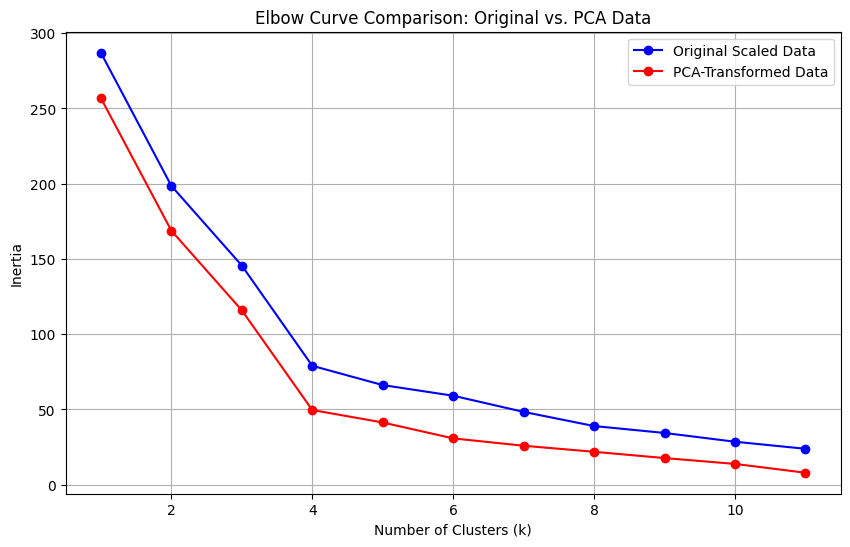

In [100]:
# Composite plot to contrast the Elbow curves
plt.figure(figsize=(10, 6))

#original scaled data
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='blue', label='Original Scaled Data')

#pca scaled data
plt.plot(k_values, pca_inertia_values, marker='o', linestyle='-', color='red', label='PCA-Transformed Data')

plt.title("Elbow Curve Comparison: Original vs. PCA Data")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.legend(loc='best')
plt.grid(True)

In [103]:
# Composite plot to contrast the clusters
composite_plot = scatter_plot + pca_scatter_plot

composite_plot.cols(2)


:Layout
   .Scatter.I   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster,coin_id)
   .NdOverlay.I :NdOverlay   [cluster]
      :Scatter   [PC1]   (PC2)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer: Using fewer features (via PCA) can improve the speed, simplicity, and visual interpretability of K-Means clustering. However, it may also lead to some loss of information, possibly impacting the accuracy and interpretability of the clusters. The impact largely depends on how well the principal components represent the essential structure of the data compared to the full feature set.** 